In [24]:
# Import all required libraries

import pandas as pd 
from glob import glob
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn import datasets
import xgboost as xgb
from scipy.stats import chi2_contingency
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [25]:
# Import the data to a pandas data frame

root = "extract_public_2018_20200825003448226_69851_20190101-20191231Texas/"
files = glob(root + '*/*_crash_*.csv')
get_df = lambda f: pd.read_csv(f)
dfdict = {f: pd.read_csv(f) for f in files}
df = pd.concat(dfdict)
df.reset_index()

,level_0,level_1,Crash_ID,Crash_Fatal_Fl,Cmv_Involv_Fl,Schl_Bus_Fl,Rr_Relat_Fl,Medical_Advisory_Fl,Amend_Supp_Fl,Active_School_Zone_Fl,...,Nonincap_Injry_Cnt,Poss_Injry_Cnt,Non_Injry_Cnt,Unkn_Injry_Cnt,Tot_Injry_Cnt,Death_Cnt,MPO_ID,Investigat_Service_ID,Investigat_DA_ID,Investigator_Narrative
0,extract_public_2018_20200825003448226_69851_20...,0,15657177,N,N,N,N,N,Y,N,...,0,0,0,1,0,0,NaN,35.0,NaN,NaN
1,extract_public_2018_20200825003448226_69851_20...,1,16406486,N,N,N,N,N,Y,N,...,0,0,1,1,0,0,NaN,23.0,NaN,NaN
2,extract_public_2018_20200825003448226_69851_20...,2,16473665,N,N,N,N,N,Y,N,...,1,0,1,0,1,0,NaN,35.0,NaN,NaN
3,extract_public_2018_20200825003448226_69851_20...,3,16871051,N,Y,N,N,N,Y,N,...,0,0,2,0,0,0,282.0,NaN,NaN,NaN
4,extract_public_2018_20200825003448226_69851_20...,4,16995273,N,N,N,N,N,Y,N,...,0,1,6,0,1,0,15.0,53.0,61.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648332,extract_public_2018_20200825003448226_69851_20...,54572,17777131,N,N,N,N,N,N,N,...,0,0,0,2,0,0,NaN,29.0,14.0,NaN
648333,extract_public_2018_20200825003448226_69851_20...,54573,17779640,N,N,N,N,N,N,N,...,0,0,2,0,0,0,15.0,NaN,NaN,NaN
648334,extract_public_2018_20200825003448226_69851_20...,54574,17783015,N,N,N,N,N,N,N,...,0,0,0,1,0,0,NaN,411.0,NaN,NaN
648335,extract_public_2018_20200825003448226_69851_20...,54575,17801355,N,N,N,N,N,N,N,...,0,0,1,0,0,0,15.0,NaN,NaN,NaN


In [146]:
# FINAL column list

filter_list =[ 
 'Rpt_CRIS_Cnty_ID',
 'Rpt_Rdwy_Sys_ID',
 'Rpt_Road_Part_ID',
 'Rpt_Sec_Rdwy_Sys_ID',
 'Rpt_Sec_Road_Part_ID',
 'Wthr_Cond_ID',
 'Light_Cond_ID',
 'Entr_Road_ID',
 'Road_Type_ID',
 'Road_Algn_ID',
 'Surf_Cond_ID',
 'Bridge_Detail_ID',
 'Harm_Evnt_ID',
 'Intrsct_Relat_ID',
 'FHE_Collsn_ID',
 'Obj_Struck_ID',
 'Othr_Factr_ID',
 'Road_Part_Adj_ID',
 'Road_Cls_ID',
 'Road_Relat_ID',
 'Phys_Featr_1_ID',
 'Phys_Featr_2_ID',
 'Crash_Sev_ID',
 'Pop_Group_ID',
 'Base_Type_ID',
 'Surf_Type_ID',
 'Curve_Type_ID',
 'Delta_Left_Right_ID',
 'Crash_Time',
 'Day_of_Week'
 ]

In [147]:
# Same as above, without our target variable "Crash_Sev_ID"


predictor_list = [ 
 'Rpt_CRIS_Cnty_ID',
 'Rpt_Rdwy_Sys_ID',
 'Rpt_Road_Part_ID',
 'Rpt_Sec_Rdwy_Sys_ID',
 'Rpt_Sec_Road_Part_ID',
 'Wthr_Cond_ID',
 'Light_Cond_ID',
 'Entr_Road_ID',
 'Road_Type_ID',
 'Road_Algn_ID',
 'Surf_Cond_ID',
 'Bridge_Detail_ID',
 'Harm_Evnt_ID',
 'Intrsct_Relat_ID',
 'FHE_Collsn_ID',
 'Obj_Struck_ID',
 'Othr_Factr_ID',
 'Road_Part_Adj_ID',
 'Road_Cls_ID',
 'Road_Relat_ID',
 'Phys_Featr_1_ID',
 'Phys_Featr_2_ID',
 'Pop_Group_ID',
 'Base_Type_ID',
 'Surf_Type_ID',
 'Curve_Type_ID',
 'Delta_Left_Right_ID',
 'Crash_Time',
 'Day_of_Week'
 ]

In [182]:
# Create a new dataframe using only the filtered columns.

df_filtered = df[filter_list]

In [154]:
# Remove all rows where Crash_Sev_ID is 0 = no data.


df_filtered = df_filtered[df_filtered.Crash_Sev_ID != 0]

In [155]:
# Depending on the type of row, either fill with 0 or drop the row entirely.

df_filtered['Rpt_Sec_Rdwy_Sys_ID'].fillna(0, inplace=True)
df_filtered['Rpt_Sec_Road_Part_ID'].fillna(0, inplace=True)
df_filtered['Base_Type_ID'].fillna(0, inplace=True)
df_filtered['Curve_Type_ID'].fillna(0, inplace=True)
df_filtered['Delta_Left_Right_ID'].fillna(0, inplace=True)

df_filtered.dropna(subset=['Surf_Type_ID'], inplace=True)

In [156]:
# Using a binning technique on the Crash_Time value, looking specifically for the hour only.

df_filtered['Crash_Time'] = pd.to_datetime(df_filtered['Crash_Time'])
df_filtered['Crash_Time'] = df_filtered['Crash_Time'].dt.strftime('%H')


In [157]:
# Replace the string values of each day of the week with a numeric value

df_filtered.loc[(df_filtered.Day_of_Week == 'MON'),'Day_of_Week']=0
df_filtered.loc[(df_filtered.Day_of_Week == 'TUE'),'Day_of_Week']=1
df_filtered.loc[(df_filtered.Day_of_Week == 'WED'),'Day_of_Week']=2
df_filtered.loc[(df_filtered.Day_of_Week == 'THU'),'Day_of_Week']=3
df_filtered.loc[(df_filtered.Day_of_Week == 'FRI'),'Day_of_Week']=4
df_filtered.loc[(df_filtered.Day_of_Week == 'SAT'),'Day_of_Week']=5
df_filtered.loc[(df_filtered.Day_of_Week == 'SUN'),'Day_of_Week']=6

In [158]:
# Replace string values of Y/N to a binary 1/0. 

df_filtered.replace(to_replace=r'^N$', value=0, regex=True, inplace=True)
df_filtered.replace(to_replace=r'^Y$', value=1, regex=True, inplace=True)

In [159]:
# One hot encoding on all of the columns. This will create many dimension, but this has proven to be the most accurate data format. This needs a lot of work still, as the column names are inconsistent (some are float values, some are int, so columns are showing up as things like 'column_name_2.0 and column_name_4 intermittently).

df_filtered = pd.get_dummies(df_filtered, columns=predictor_list)

In [160]:
# Due to how XGBoost works, shift the scale of the target variable from 1-5 to 0-4.

df_filtered['Crash_Sev_ID'].replace({1:0, 2:1, 3:2, 4:3, 5:4}, inplace = True)

In [84]:
# It is important to create a test/train set BEFORE any balanacing.

train, test = train_test_split(df_filtered, test_size=0.2, random_state=42, shuffle=True)

In [86]:
# Balance the data using resampling. I have included both over and undersample examples, though the undersampled data did not perform near as well.

count_class_1, count_class_2, count_class_3, count_class_4, count_class_5 = train.Crash_Sev_ID.value_counts()
df_class_1 = train[train['Crash_Sev_ID'] == 0]
df_class_2 = train[train['Crash_Sev_ID'] == 1]
df_class_3 = train[train['Crash_Sev_ID'] == 2]
df_class_4 = train[train['Crash_Sev_ID'] == 3]
df_class_5 = train[train['Crash_Sev_ID'] == 4]

df_class_5_under = df_class_5.sample(count_class_5)
df_class_3_under = df_class_3.sample(count_class_5)
df_class_2_under = df_class_2.sample(count_class_5)
df_class_1_under = df_class_1.sample(count_class_5)

df_test_under = pd.concat([df_class_5_under, df_class_3_under, df_class_2_under, df_class_1_under, df_class_4], axis=0)

df_class_5_over = df_class_5.sample(count_class_1, replace=True)
df_class_4_over = df_class_4.sample(count_class_1, replace=True)
df_class_3_over = df_class_3.sample(count_class_1, replace=True)
df_class_2_over = df_class_2.sample(count_class_1, replace=True)
df_class_1_over = df_class_1.sample(count_class_1, replace=True)

df_test_over = pd.concat([df_class_4_over, df_class_3_over, df_class_2_over, df_class_1_over, df_class_5], axis=0)

In [96]:
# Create a train set with the balanced data, and a test set with the original data. 

X_train, y_train = df_test_over.loc[:, df_test_over.columns != 'Crash_Sev_ID'], df_test_over['Crash_Sev_ID']
X_test, y_test = df_filtered.loc[:, df_filtered.columns != 'Crash_Sev_ID'], df_filtered['Crash_Sev_ID']

In [99]:
# Dmatrix file type required for the XGBoost modeling. 

D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

In [109]:
#Spent a LOT of time here setting the parameters of the model. Tuning this model could be a project all to itself. Since this is a multiclass classification problem, we use the 'softprob' model.

param = {
    'eta': 0.3, 
    'max_depth': 28,  
    'objective': 'multi:softprob',
    'num_class': 5
    } 

steps = 20  

In [110]:
# Train the model (go get some coffee)

model = xgb.train(param, D_train, steps)

In [111]:
# Evaluate the model. This model performed poorly, with a very low f1 score for the most important target variable, the 4th target 'Fatal'.

preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))
print("F1 Score = {}".format(f1_score(y_test, best_preds, average=None)))

Precision = 0.673716326013903
Recall = 0.8081057107558098
Accuracy = 0.8167134043746495
F1 Score = [0.67304643 0.6891927  0.71832048 0.68508099 0.87734261]


In [112]:
# Brute force attempt at tuning the model resulted in this. 
param2 = {
    'eta': 0.3, 
    'max_depth': 40,  
    'objective': 'multi:softprob',
    'num_class': 5
    } 

steps2 = 30 

In [113]:
# Train the model (go get lunch)

model2 = xgb.train(param2, D_train, steps2)

In [183]:
# Evaluate the model

preds2 = model2.predict(D_test)
best_preds2 = np.asarray([np.argmax(line) for line in preds2])

print("Precision = {}".format(precision_score(y_test, best_preds2, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds2, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds2)))
print("F1 Score = {}".format(f1_score(y_test, best_preds2, average=None)))

Precision = 0.8686592573764884
Recall = 0.8476801175541061
Accuracy = 0.9098990465507572
F1 Score = [0.82939812 0.83182063 0.83644236 0.84808511 0.94351241]


In [ ]:
# This model is a significant improvement, and we're closing in on a model I am happy with.

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.0
56.0
57.0
58.0
59.0
60.0


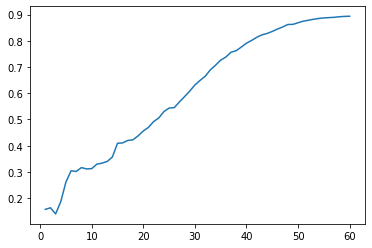

In [171]:
# I evaluated several other models. One model that performed reasonably well was a decision tree. The tuning for this involved finding the best max depth. I included a counter just to keep track of the progress since it's pretty slow, but the results are very interesting. You can see where the model accuracy starts to peak out, after which point you will see overfitting issues.

max_depths = np.linspace(1, 60, 60, endpoint=True)
train_results = []

for max_depth in max_depths:
   dt = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_test)
   train_pred_score = metrics.accuracy_score(y_test, train_pred)
   train_results.append(train_pred_score)
   print(max_depth)

from matplotlib.legend_handler import HandlerLine2D
line1 = plt.plot(max_depths, train_results)
plt.show()

In [172]:
# train a model based on the above results.

dtc = DecisionTreeClassifier(criterion="entropy", max_depth = 55)
dtc.fit(X_train,y_train)

In [180]:
y_hat = dtc.predict(X_test)

In [181]:
#This is a much lower F1 score than our XGBoost model, but far higher than the roughly 40% I got with the undersampled data
f1_score(y_test, y_hat, average='macro')

0.8124566258838989

In [174]:
# One more model, a Random Forest Classifier. I did no tuning on this one, just wanted to test how accurate this model could be.

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_hat=clf.predict(X_test)

In [179]:
#This actually ended up being the best F1 score out of the bunch, and we didn't even do any parameter tuning.

f1_score(y_test, y_hat, average='macro')

0.889292077579585

In [176]:
#This is the metric I was most interested in at the end of the day, because I wanted to see how accurate it was at predicting the most under-represented, and most deadly, value. It turned out pretty well.
 
recall_score(y_test, y_hat, average=None)

array([0.80973032, 0.81012434, 0.80169641, 0.82056619, 0.98242943])